IMPORTAR BIBLIOTECAS

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

LER ARQUVIO CSV

In [3]:
df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', sep=';', encoding='latin-1')


CRIANDO UM GRÁFICO

In [4]:
regiao = df['REGIAO_BENEFICIARIO'].value_counts()

In [5]:
cor = df['RACA_BENEFICIARIO'].value_counts()

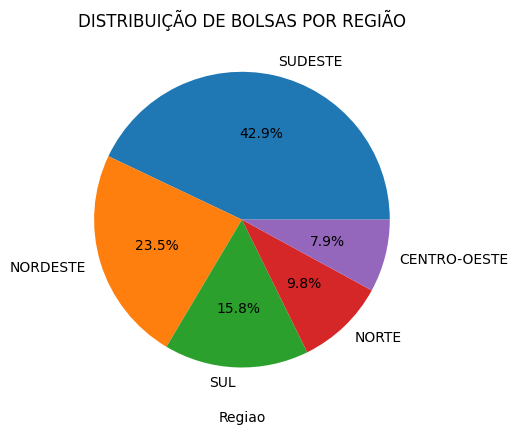

In [6]:
regiao.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel("Regiao")
plt.ylabel("")
plt.title('DISTRIBUIÇÃO DE BOLSAS POR REGIÃO')
plt.show()

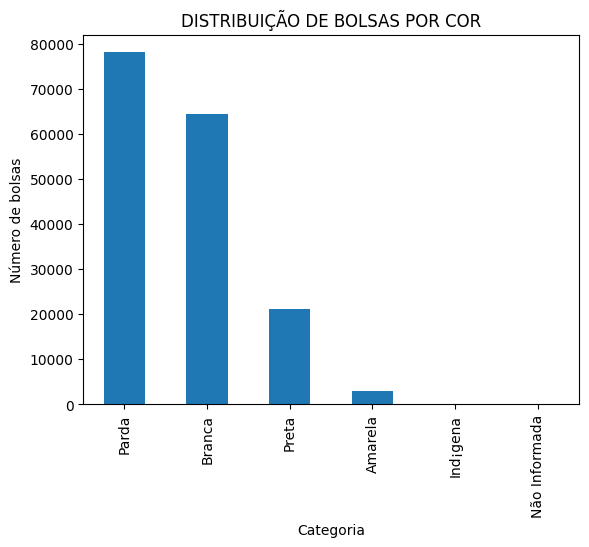

In [7]:
cor.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Número de bolsas')
plt.title('DISTRIBUIÇÃO DE BOLSAS POR COR')
plt.show()

GERANDO PDF COM FPDF

In [8]:
from fpdf import FPDF

In [9]:
pdf = FPDF(orientation='p', unit='mm', format='A4')

In [10]:
pdf.add_page()


In [11]:
pdf.set_font("Helvetica", size=16, style='B')

In [12]:
pdf.cell(w=0, h=10,text="DIVISÃO DE BOLSAS POR COR E REGIÃO", align='c')

False

In [13]:
pdf.ln(10)

In [14]:
pdf.set_font(size=14)

In [15]:
pdf.cell(0, 15, "SOBRE O PROUNI", align='c')


False

In [16]:
pdf.ln(15)

In [17]:
pdf.set_font(size=12)
pdf.multi_cell(w=0,h=5, text="Sabe-se que o PROUNI é um programa do Ministério da Educação que visa disponibilizar bolsas de estudo integrais e parciais em instituições particulares de ensino superior, promovendo a capacitação e desenvolvimento da população brasileira, entretanto com base na análise dos dados do PROUNI 2020, obtidos no site do MEC, é possível perceber alta disparidade na presença de povos indígenas comparado a outras cores ou raças.", align='j')

False

In [18]:
pdf.ln(10)

In [19]:
pdf.cell(w=0,h=5, text="O gráfico abaixo demonstra tamanha diferença, pode-se dizer que sua participação é nula.")

False

In [20]:
cor.plot(kind='bar')
plt.title('Bolsas por cor ou raça')
plt.ylabel("")
plt.savefig('graphic_cor.png')
plt.close()

In [21]:
pdf.image('graphic_cor.png', x=20, y=80,w=180)

{'data': b'x\x9c\xed\xdd\tTU\xe5\xfa\xf8\xf1\x149\x08*\xa2\x82\x13"9g\x90C\xa9\xa9\xa9\r*\x0e\x99f+\xf3G\x83\x95\x85z\xd5\xab\xfdT4\xeb*M\x0eMv\xbb8d\x83z\xfbi\x92ZZ7\r3\xb5\xb2T\x92\xeb\x0c\xa8\xe5\x94\x97R\xcb\xa4LQ\x11\xf9?\x7f\xf6r\xafsq\x0b\r\x1e\xde\x9e\xb3\xbf\x9fu\xd7]\x9b\xb3\xe1\xf0>G;_\xde\xe39\x87+\n\x00\x00@\xa9\xbb\xc2\xf4\x02\x00\x00p#\x02\x0c\x00\x80\x01\x04\x18\x00\x00\x03\x080\x00\x00\x06\x10`\x00\x00\x0c \xc0\x00\x00\x18@\x80\x01\x000\x80\x00\x03\x00`\x00\x01\x06\x00\xc0\x00\x02\x0c\x00\x80\x01\x04\x18\x00\x00\x03\x080\x00\x00\x06\x10`\x00\x00\x0c \xc0\x00\x00\x18@\x80\x01\x000\x80\x00\x03\x00`\x00\x01\x06\x00\xc0\x00\x02\x0c\x00\x80\x01\x04\x18\x00\x00\x03\x080\x00\x00\x06\x10`\x00\x00\x0c \xc0\x00\x00\x18@\x80\x01\x000\x80\x00\x03\x00`\x00\x01\x06\x00\xc0\x00\x02\x0c\x00\x80\x01\x04\x18\x00\x00\x03\x080\x00\x00\x06\x10`\x00\x00\x0c \xc0\x00\x00\x18@\x80\x01\x000\x80\x00\x03\x00`\x00\x01\x06\x00\xc0\x00\x02\x0c\x00\x80\x01\x04\x18(\x88\x8e\x8e\xbe\xff\xfe\xfbM\xaf\x

In [22]:
regiao.plot(kind='pie', autopct='%1.1f%%')
plt.title('Bolsas por região')
plt.ylabel("")
plt.savefig('graphic_regiao.png')
plt.close()

In [23]:
pdf.add_page()
pdf.image('graphic_regiao.png', x=20, y=10, w=180)

{'data': b'x\x9c\xed\xdd\x05XTi\x1b\x06`\xbaS@\x04\xc5@\xc1VT\xecU\xd7.\xd4\xb5\xb0c]\xbb{\xad\x15\xc1\x0el,P\\\x03[\xecn1\xd7\xc2\x00[\xec\xc6\xa2k\xfeW\x8f;\xff\xec\xd003\xef\xc4s\xefs\xed5s\xe6\xcca\xc0\xf9\xce3\xdfp\xe6\xa0%\x02\x00\x00\x00\x85\xd3\xe2~\x00\x00\x00\x00\x9a\x08\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x00\x05\x0c\x00\x00\xc0\x0

In [24]:
pdf.output('nss_py_project.pdf')